# Intelligent Control (ECE-DK807)

## Electrical and Computer Engineering Department, University of Patras Greece

**Instructor:** Konstantinos Chazilygeroudis (costashatz@upatras.gr)

## Lab 1

### 2D Grid World

<img src="my_image.png" width="200"/>

- S (blue) is the starting position
- G (green) is the goal
- Red cells are lava

At each timestep, the agent can be in only one cell. The agent has available the following actions:

1. Move Up
2. Move Down
3. Move Right
4. Move Left

If a move would make the agent go "out of bounds", then the move has no effect and the agent remains in place. The agent receives the following rewards:

- $-1$ for each step
- $-10$ for stepping on lava
- $50$ for stepping on goal

The environment "stops" when the agent reaches the goal or steps on lava.

We first need to define the *Markov Decision Process* (MDP) for this problem/world.

In [18]:
# Let's first import modules
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
import copy

<img src="im2.png" width="200"/>

In [19]:
### TO-DO: Define the state space. We want to define each cell with a tuple (i,j), 
# and we want to save all cells/states in a list called 'states'.
### ANSWER: Insert code here
states=[]
for i in range(4):
    for j in range(4):
        s=(i,j)
        states.append(s)
#print(states)
### END of ANSWER

# Helper function that returns true when a cell is lava
def is_lava(s):
    return (s == (1, 1) or s == (1, 2))

# Helper function that returns true when a cell is terminal
def is_terminal(s):
    return (s == (3, 3))

### TO-DO: Define the action space. This is a list of all possible actions.
#  Save it in a variable named 'actions'.
### ANSWER: Insert code here
a1,a2,a3,a4="Move Up","Move Left","Move Right","Move Down"
actions=[a1,a2,a3,a4]
#print(actions)
### END of ANSWER

# Let's define the transition table
transition = {}
# We initial all to zeros
for s in states:
    for a in actions:
        for sp in states:
            transition[(s, a, sp)] = 0.
### TO-DO: Fill all actions
### ANSWER: Insert code here
for s in states:
    for a in actions:
        sp=s
        if is_terminal(s):
            sp=s
        elif is_lava(s):
            sp=s
        elif a==a1: #up
            if s[0]>0: sp=(s[0]-1,s[1])
        elif a==a2: #left
            if s[1]>0: sp=(s[0],s[1]-1)
        elif a==a3: #right
            if s[1]<3: sp=(s[0],s[1]+1)
        elif a==a4: #down
            if s[0]<3: sp=(s[0]+1,s[1])
        transition[(s, a, sp)] = 1.
#print(transition)
### END of ANSWER

# Let's define the reward table/function
reward = {}
for s in states:
    ### TO-DO: Fill with values
    ### ANSWER: Insert code here
    if is_lava(s):
        reward[s]=-10.
    elif is_terminal(s):
        reward[s]=50.
    else:
        reward[s]=-1.
    ### END of ANSWER

def return_next_state(s,a):
    sp=s
    if is_terminal(s):
        sp=s
    elif is_lava(s):
        sp=s
    elif a==a1: #up
        if s[0]>0: sp=(s[0]-1,s[1])
    elif a==a2: #left
        if s[1]>0: sp=(s[0],s[1]-1)
    elif a==a3: #right
        if s[1]<3: sp=(s[0],s[1]+1)
    elif a==a4: #down
        if s[0]<3: sp=(s[0]+1,s[1])
    return sp

In [20]:
assert(len(states) == 16)
assert(len(actions) == 4)
assert(reward[(2, 1)] == -1.)
assert(reward[(1, 1)] == reward[(1, 2)] == -10.)
assert(reward[(3, 3)] == 50.)
assert(len(transition) == 1024)


### Iterative Policy Evaluation (IPE)

**Goal:** We want to find the *Value function* $V_{\pi}(\boldsymbol{s})$ of a *specific* policy $\pi$.

Very simple algorithm:

- Iterative application of the Bellman expectation equations
- At each iteration we get closer to the actual Value function
- At each iteration $k+1$:
  - For all states $\boldsymbol{s}\in\mathcal{S}$
  - Compute $V_{\pi}^{k+1}$ using $V_{\pi}^k$: $V_{\pi}^{k+1}(\boldsymbol{s}) = \sum_{\boldsymbol{a}\in\mathcal{A}}\pi(\boldsymbol{a}|\boldsymbol{s})\Big(R(\boldsymbol{s},\boldsymbol{a}) + \gamma\sum_{\boldsymbol{s}'\in\mathcal{S}}P(\boldsymbol{s},\boldsymbol{a},\boldsymbol{s}')V_{\pi}^k(\boldsymbol{s}')\Big)$
- We can prove that this converges to the true Value function


**Let's implement IPE for our 2D grid world and the random policy.** Let's start by creating a function for the policy:

In [22]:
# Uniform policy
policy = {}
# Let's create a uniform random policy
for s in states:
    for a in actions:
        policy[(s, a)] = 1. / float(len(actions))

Now let's create a function that computes $V_{\pi}^{k+1}$ using $V_{\pi}^k$: $V_{\pi}^{k+1}(\boldsymbol{s}) = \sum_{\boldsymbol{a}\in\mathcal{A}}\pi(\boldsymbol{a}|\boldsymbol{s})\Big(R(\boldsymbol{s},\boldsymbol{a}) + \gamma\sum_{\boldsymbol{s}'\in\mathcal{S}}P(\boldsymbol{s},\boldsymbol{a},\boldsymbol{s}')V_{\pi}^k(\boldsymbol{s}')\Big)$. In other words, performs one iteration of the IPE algorithm:

In [ ]:
def ipe_iter(Vk, gamma = 0.9):
    Vkp1 = copy.copy(Vk)
    ### TO-DO: Implement iterate. Fill Vkp1 (V_{k+1}) with the correct values. Vk is a dictionary.
    for s in states:
        ### ANSWER: Insert code here
        Vkp1[s]=0.
        for a in actions:
            expected_return=0.
            if is_terminal(s) or is_lava(s):
                expected_return=0.
            #elif is_terminal(next_state) or is_lava(next_state):
            #    next_return = 0.0    
            else:
                for sp in states:
                    expected_return+=transition[(s, a, sp)]*Vk[sp]
                
            
            Vkp1[s]+=policy[(s, a)]*(reward[s]+gamma*expected_return)  
        ### END of ANSWER
    return Vkp1

Now let's implement the whole algorithm!

In [6]:
def ipe(gamma = 0.5, max_iters = 20):
    V = {}
    ### TO-DO: Initialize the value function (V) with zeros
    ### ANSWER: Insert code here
    for s in states:
        V[s]=0.
    ### END of ANSWER
    
    for i in range(max_iters):
        ### TO-DO: Implement body for iterative policy evaluation
        ### ANSWER: Insert code here
        V=ipe_iter(V,gamma)
        ### END of ANSWER
    return V

V = ipe(0.5, 20)


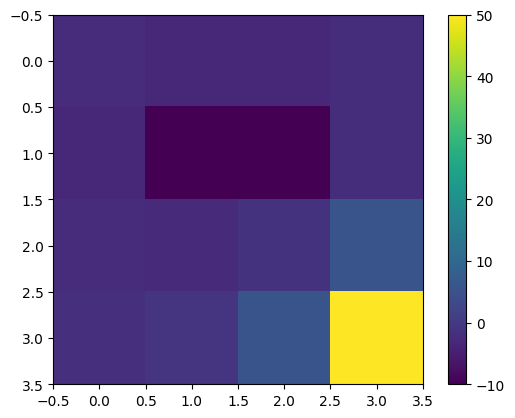

{(0, 0): -2.4413716414811613, (0, 1): -3.4028429743390936, (0, 2): -3.3785295522563334, (0, 3): -2.2468642023764045, (1, 0): -3.245387444562612, (1, 1): -10.0, (1, 2): -10.0, (1, 3): -2.1026560277119195, (2, 0): -2.276340879957198, (2, 1): -2.8095311841053725, (2, 2): -1.199441486813182, (2, 3): 5.528271803483558, (3, 0): -1.8794679630979898, (3, 1): -1.000467355412784, (3, 2): 5.68572733326004, (3, 3): 50.0}


In [7]:
# Let's plot the value function
def plot_value_function(V):
    # Visualize Value function
    _, ax = plt.subplots()
    img = np.zeros((4, 4))
    for state in states:
        img[state] = V[state]
    im = ax.imshow(img)
    ax.figure.colorbar(im, ax=ax)
    plt.show()

plot_value_function(V)

print(V)

In [8]:
assert(np.isclose(V[(0, 0)], -2.4413716414811613))
assert(np.isclose(V[(3, 2)], 5.68572733326004))
assert(np.isclose(V[(3, 3)], 50.))
assert(np.isclose(V[(1, 1)], -10.))


Now let's create a policy that always chooses the 'Move Right' Action, and re-run the iterative policy evaluation!

In [9]:
# Policy that alwas moves right!
policy = {}
### TO-DO: Create a policy that always moves right
### ANSWER: Insert code here
for s in states:
    for a in actions:
        if a==a3:
            policy[(s, a)] = 1.
        else: 
            policy[(s, a)] = 0.
### END of ANSWER

In [10]:
# Re-run Iterative Policy Evaluation
V = ipe(0.5, 20)

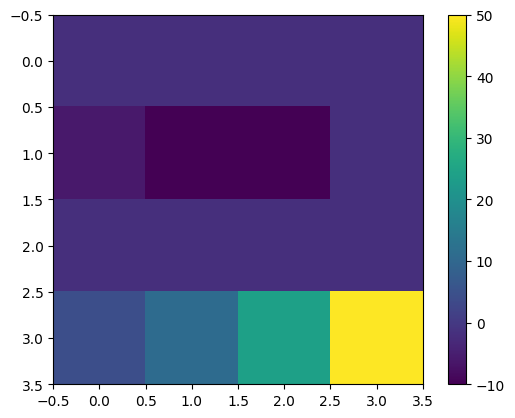

{(0, 0): -1.9999980926513672, (0, 1): -1.9999980926513672, (0, 2): -1.9999980926513672, (0, 3): -1.9999980926513672, (1, 0): -6.0, (1, 1): -10.0, (1, 2): -10.0, (1, 3): -1.9999980926513672, (2, 0): -1.9999980926513672, (2, 1): -1.9999980926513672, (2, 2): -1.9999980926513672, (2, 3): -1.9999980926513672, (3, 0): 4.5, (3, 1): 11.0, (3, 2): 24.0, (3, 3): 50.0}


In [11]:
plot_value_function(V)

print(V)

In [12]:
assert(np.isclose(V[(0, 0)], -1.9999980926513672))
assert(np.isclose(V[(3, 2)], 24.))
assert(np.isclose(V[(3, 3)], 50.))
assert(np.isclose(V[(1, 1)], -10.))


### Policy Iteration

**Goal:** Find the *optimal* policy

- We start from an initial policy $\pi_0$
- Policy Evaluation to compute $V_{\pi}^{k+1}(\boldsymbol{s})$
- (Greedy) Policy Improvement: $\pi_{k+1}=\max_{\pi}V_{\pi}^{k+1}(\boldsymbol{s})$
- As we increase the iterations, we get more accurate results
- We can prove that it converges to the optimal policy

Let's implement it for our world!

{((0, 0), 'Move Up'): 0.0, ((0, 0), 'Move Left'): 0.0, ((0, 0), 'Move Right'): 0.5, ((0, 0), 'Move Down'): 0.5, ((0, 1), 'Move Up'): 0.0, ((0, 1), 'Move Left'): 0.0, ((0, 1), 'Move Right'): 1.0, ((0, 1), 'Move Down'): 0.0, ((0, 2), 'Move Up'): 0.0, ((0, 2), 'Move Left'): 0.0, ((0, 2), 'Move Right'): 1.0, ((0, 2), 'Move Down'): 0.0, ((0, 3), 'Move Up'): 0.0, ((0, 3), 'Move Left'): 0.0, ((0, 3), 'Move Right'): 0.0, ((0, 3), 'Move Down'): 1.0, ((1, 0), 'Move Up'): 0.0, ((1, 0), 'Move Left'): 0.0, ((1, 0), 'Move Right'): 0.0, ((1, 0), 'Move Down'): 1.0, ((1, 1), 'Move Up'): 0.25, ((1, 1), 'Move Left'): 0.25, ((1, 1), 'Move Right'): 0.25, ((1, 1), 'Move Down'): 0.25, ((1, 2), 'Move Up'): 0.25, ((1, 2), 'Move Left'): 0.25, ((1, 2), 'Move Right'): 0.25, ((1, 2), 'Move Down'): 0.25, ((1, 3), 'Move Up'): 0.0, ((1, 3), 'Move Left'): 0.0, ((1, 3), 'Move Right'): 0.0, ((1, 3), 'Move Down'): 1.0, ((2, 0), 'Move Up'): 0.0, ((2, 0), 'Move Left'): 0.0, ((2, 0), 'Move Right'): 0.5, ((2, 0), 'Move Down'

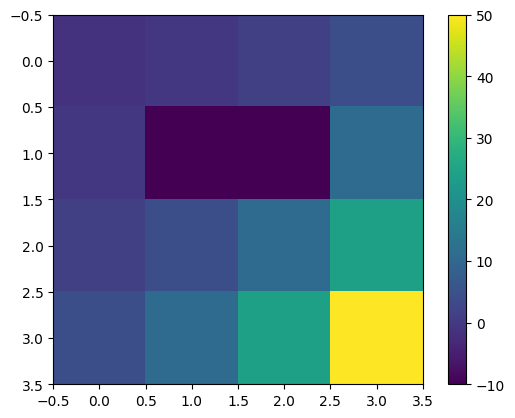

{(0, 0): -1.1875, (0, 1): -0.375, (0, 2): 1.25, (0, 3): 4.5, (1, 0): -0.375, (1, 1): -10.0, (1, 2): -10.0, (1, 3): 11.0, (2, 0): 1.25, (2, 1): 4.5, (2, 2): 11.0, (2, 3): 24.0, (3, 0): 4.5, (3, 1): 11.0, (3, 2): 24.0, (3, 3): 50.0}


In [14]:
V = {}
### TO-DO: Initialize the value function (V) with zeros. Just copy from above
### ANSWER: Insert code here
V = {s: 0. for s in states}
### END of ANSWER

# Let's create an initial policy (uniform random)
policy = {}
for s in states:
    for a in actions:
        policy[(s, a)] = 1. / float(len(actions)) # uniform

# Policy Iteration
gamma = 0.5
max_iters = 20
for i in range(max_iters):
    # At each iteration, we first perform Iterative Policy Evaluation
    V = ipe(gamma)
    # We, then, perform the Greedy Policy Improvement
    ### TO-DO: Implement greedy policy improvement. In other words, we need to update the "policy" given the Value function (V)
    ### ANSWER: Insert code here
    for s in states:
        value = {a: V[return_next_state(s, a)] for a in actions}
        max_value = max(value.values())
        best_actions = [a for a in actions if value[a] == max_value]
        for a in actions:
            policy[(s, a)] = 1. / len(best_actions) if a in best_actions else 0.
    '''for s in states:
        value={}
        for a in actions:
            next_state=None
            next_state=return_next_state(s,a)
            #for sp in states:
            #    if transition[(s, a, sp)]==1.: 
            #        next_state=sp
            #        break
            value[a]=V[next_state]
            #value[a]=(reward[s]+gamma*V[next_state])
        best_action = max(value, key=value.get)
        counter=0
        ls=[]
        for a in actions:
            if value[a]<value[best_action]:
                policy[(s,a)]=0.
            else:
                ls.append(a)
                counter+=1
        for a in ls:
            policy[(s,a)]=float(1./counter)'''
            
    ### END of ANSWER

print(policy)
plot_value_function(V)
print(V)

In [15]:
assert(V[(0, 0)] == -1.1875)
assert(V[(0, 1)] == -0.375)
assert(V[(3, 3)] == 50.)
assert(V[(3, 2)] == 24.)
assert(V[(3, 1)] == 11.)

for a in actions:
    assert(policy[((3, 3), a)] == 0.25)
assert(policy[((3, 2), 'Move Right')] == 1.)


### Value Iteration

**Goal:** Find the *optimal* policy

- Iterative application of the *Bellman Equations*
- At each iteration $k+1$:
  - For all states $\boldsymbol{s}\in\mathcal{S}$
  - Compute $V_*^{k+1}$ using $V_*^k$: $V_*^{k+1}(\boldsymbol{s}) = \max_{\boldsymbol{a}}\Big(R(\boldsymbol{s},\boldsymbol{a}) + \gamma\sum_{\boldsymbol{s}'\in\mathcal{S}}P(\boldsymbol{s},\boldsymbol{a},\boldsymbol{s}')V_*^k(\boldsymbol{s}')\Big)$
- We can prove that this converges to the optimal Value function

Let's implement it for our world!

{((0, 0), 'Move Up'): 0.0, ((0, 0), 'Move Left'): 0.0, ((0, 0), 'Move Right'): 0.5, ((0, 0), 'Move Down'): 0.5, ((0, 1), 'Move Up'): 0.0, ((0, 1), 'Move Left'): 0.0, ((0, 1), 'Move Right'): 1.0, ((0, 1), 'Move Down'): 0.0, ((0, 2), 'Move Up'): 0.0, ((0, 2), 'Move Left'): 0.0, ((0, 2), 'Move Right'): 1.0, ((0, 2), 'Move Down'): 0.0, ((0, 3), 'Move Up'): 0.0, ((0, 3), 'Move Left'): 0.0, ((0, 3), 'Move Right'): 0.0, ((0, 3), 'Move Down'): 1.0, ((1, 0), 'Move Up'): 0.0, ((1, 0), 'Move Left'): 0.0, ((1, 0), 'Move Right'): 0.0, ((1, 0), 'Move Down'): 1.0, ((1, 1), 'Move Up'): 0.25, ((1, 1), 'Move Left'): 0.25, ((1, 1), 'Move Right'): 0.25, ((1, 1), 'Move Down'): 0.25, ((1, 2), 'Move Up'): 0.25, ((1, 2), 'Move Left'): 0.25, ((1, 2), 'Move Right'): 0.25, ((1, 2), 'Move Down'): 0.25, ((1, 3), 'Move Up'): 0.0, ((1, 3), 'Move Left'): 0.0, ((1, 3), 'Move Right'): 0.0, ((1, 3), 'Move Down'): 1.0, ((2, 0), 'Move Up'): 0.0, ((2, 0), 'Move Left'): 0.0, ((2, 0), 'Move Right'): 0.5, ((2, 0), 'Move Down'

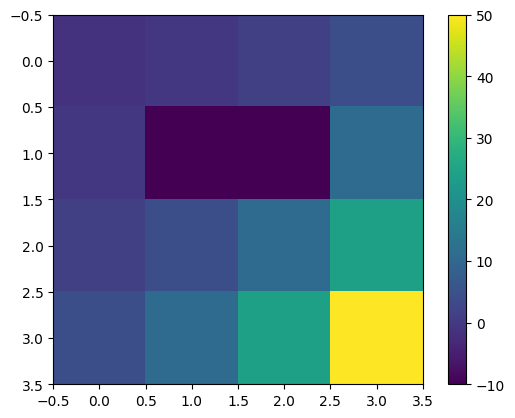

{(0, 0): -1.1875, (0, 1): -0.375, (0, 2): 1.25, (0, 3): 4.5, (1, 0): -0.375, (1, 1): -10.0, (1, 2): -10.0, (1, 3): 11.0, (2, 0): 1.25, (2, 1): 4.5, (2, 2): 11.0, (2, 3): 24.0, (3, 0): 4.5, (3, 1): 11.0, (3, 2): 24.0, (3, 3): 50.0}


In [16]:
V = {}
### TO-DO: Initialize the value function (V) with zeros. Just copy from above
### ANSWER: Insert code here
V = {s: 0. for s in states}
### END of ANSWER

# Let's create an initial policy (uniform random)
policy = {}
for s in states:
    for a in actions:
        policy[(s, a)] = 1. / float(len(actions)) # uniform

gamma = 0.5
max_iters = 20
for i in range(max_iters):
    Vkp1 = copy.copy(V)
    for s in states:
        ### TO-DO: Implement iterate of Value Iteration. Compute Vkp1 (V_{k+1}) using the above equation.
        ### ANSWER: Insert code here
        dicti={}
        for a in actions:
            sum1=0
            if is_terminal(s) or is_lava(s):
                sum1=0.
            else:
                for sp in states:
                    sum1+=transition[(s,a,sp)]*V[sp]                
            dicti[a]=reward[s]+gamma*sum1
        #best_action = max(dicti, key=dicti.get)
        Vkp1[s]=max(dicti.values())
        #print(best_action)
    V = copy.copy(Vkp1)

# In order to compute the final policy, we do Greedy Policy Improvement.

### TO-DO: Implement greedy policy improvement (copy from before)
### ANSWER: Insert code here
gamma = 0.5
max_iters = 20
for i in range(max_iters):
    # We, then, perform the Greedy Policy Improvement
    ### TO-DO: Implement greedy policy improvement. In other words, we need to update the "policy" given the Value function (V)
    ### ANSWER: Insert code here
    for s in states:
        value = {a: V[return_next_state(s, a)] for a in actions}
        max_value = max(value.values())
        best_actions = [a for a in actions if value[a] == max_value]
        for a in actions:
            policy[(s, a)] = 1. / len(best_actions) if a in best_actions else 0.
        '''for a in actions:
            next_state=None
            next_state=return_next_state(s,a)
            #for sp in states:
            #    if transition[(s, a, sp)]==1.: 
            #        next_state=sp
            #        break
            value[a]=V[next_state]
            #value[a]=(reward[s]+gamma*V[next_state])'''
        '''counter=0
        ls=[]
        for a in actions:
            if value[a]<value[best_action]:
                policy[(s,a)]=0.
            else:
                ls.append(a)
                counter+=1
        for a in ls:
            policy[(s,a)]=float(1./counter)'''
### END of ANSWER

print(policy)
plot_value_function(V)
print(V)

In [17]:
assert(V[(0, 0)] == -1.1875)
assert(V[(0, 1)] == -0.375)
assert(V[(3, 3)] == 50.)
assert(V[(3, 2)] == 24.)
assert(V[(3, 1)] == 11.)

for a in actions:
    assert(policy[((3, 3), a)] == 0.25)
assert(policy[((3, 2), 'Move Right')] == 1.)
